In [ ]:
# 필요한 패키지 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats  

In [ ]:
# train 데이터의 X와 Y를 분리해주는 함수
def dataset_split_X_y(df):    
    """
    @Description: split data into features and labels
    @Param: df, pandas dataframe with columns starting with X for features and Y for labels
    @Return: features and labels in pandas dataframes
    """
    xs = df.filter(regex='X') # Input : X Feature
    ys = df.filter(regex='Y') # Output : Y Feature
    return xs, ys

In [ ]:
# 데이터 불러오기
train_df = pd.read_csv('./train.csv')
test_x = pd.read_csv('./test.csv')
# train 데이터의 x와 y를 분리
train_x, train_y = dataset_split_X_y(train_df)

In [ ]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39607 entries, 0 to 39606
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y_01    39607 non-null  float64
 1   Y_02    39607 non-null  float64
 2   Y_03    39607 non-null  float64
 3   Y_04    39607 non-null  float64
 4   Y_05    39607 non-null  float64
 5   Y_06    39607 non-null  float64
 6   Y_07    39607 non-null  float64
 7   Y_08    39607 non-null  float64
 8   Y_09    39607 non-null  float64
 9   Y_10    39607 non-null  float64
 10  Y_11    39607 non-null  float64
 11  Y_12    39607 non-null  float64
 12  Y_13    39607 non-null  float64
 13  Y_14    39607 non-null  float64
dtypes: float64(14)
memory usage: 4.2 MB


In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39607 entries, 0 to 39606
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_01    39607 non-null  float64
 1   X_02    39607 non-null  float64
 2   X_03    39607 non-null  float64
 3   X_04    39607 non-null  int64  
 4   X_05    39607 non-null  float64
 5   X_06    39607 non-null  float64
 6   X_07    39607 non-null  float64
 7   X_08    39607 non-null  float64
 8   X_09    39607 non-null  float64
 9   X_10    39607 non-null  float64
 10  X_11    39607 non-null  float64
 11  X_12    39607 non-null  float64
 12  X_13    39607 non-null  float64
 13  X_14    39607 non-null  float64
 14  X_15    39607 non-null  float64
 15  X_16    39607 non-null  float64
 16  X_17    39607 non-null  float64
 17  X_18    39607 non-null  float64
 18  X_19    39607 non-null  float64
 19  X_20    39607 non-null  float64
 20  X_21    39607 non-null  float64
 21  X_22    39607 non-null  float64
 22

In [ ]:
train_x.head()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762


In [ ]:
train_y.describe()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,1.353814,1.057267,1.014002,13.621191,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,0.356223,0.386266,0.361492,2.686632,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,0.017000,0.007000,0.017000,-0.331000,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,1.127500,0.793000,0.769000,11.822000,29.768000,16.146000,2.863000,-26.689000,-26.702000,-22.871000,23.836000,-26.630000,-26.624000,-26.640000
50%,1.349000,1.044000,0.998000,13.837000,31.710000,16.694000,3.126000,-26.254000,-26.266000,-22.275000,24.420000,-26.198000,-26.193000,-26.204000
75%,1.576000,1.300000,1.239000,15.626000,33.184000,17.164000,3.433500,-25.855000,-25.871000,-21.791000,24.911500,-25.799000,-25.794000,-25.809000
max,4.409000,3.998000,3.756000,98.794000,37.250000,18.998000,5.299000,-23.785000,-23.960000,-20.052000,26.703000,-23.722000,-23.899000,-23.856000


In [ ]:
ys = ['Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 
      'Y_06', 'Y_07', 'Y_08', 'Y_09', 'Y_10', 
      'Y_11', 'Y_12', 'Y_13', 'Y_14']
# y의 양품 범위
ys_bounds = [[0.2, 2], [0.2, 2.1], [0.2, 2.1], 
             [7, 19], [22, 36.5], [-19.2, 19], 
             [2.4, 4], [-29.2, -24], [-29.2, -24],
             [-30.6, -20], [19.6, 26.6], [-29.2, -24],
             [-29.2, -24], [-29.2, -24]]

In [ ]:
# y_feature를 불량: 1, 양품: 0으로 반환
df_indicator = pd.DataFrame()
for idx in range(len(ys)):
    y_series = ~train_y[ys[idx]].between(ys_bounds[idx][0], ys_bounds[idx][1])
    df_indicator = pd.concat([df_indicator, y_series.astype(int)], axis = 1)

In [ ]:
y_series

0        False
1        False
2        False
3        False
4        False
         ...  
39602    False
39603    False
39604    False
39605    False
39606    False
Name: Y_14, Length: 39607, dtype: bool

In [ ]:
df_indicator

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39603,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39604,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39605,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
def boxplot_generator(train_column = 'X_01', target_column = 'Y_01'):
    test = pd.DataFrame({'values': train_x[train_column], 'group': df_indicator[target_column]}) # df 만들기
    ax = sns.boxplot(x = 'group', y = 'values', data = test, showfliers = True)
    ax.set_title('{}'.format(train_column), fontsize = 14)
    result = dict()
    for categ, data in test.groupby('group'):
        data = data.iloc[:, :-1] # group을 제외하여 data에 반환
        stats = boxplot_stats(data)
        result[categ] = list(set(stats[0]['fliers'])) # fliiers열만 출력 
    return result # outliers

{0: [74.623,
  75.642,
  76.662,
  77.682,
  78.702,
  79.721,
  80.741,
  81.761,
  82.78,
  83.8,
  84.82,
  56.268,
  58.307,
  59.327,
  60.347,
  61.366],
 1: [74.623, 75.642, 76.662, 77.682, 79.721, 80.741, 84.82, 58.307, 61.366]}

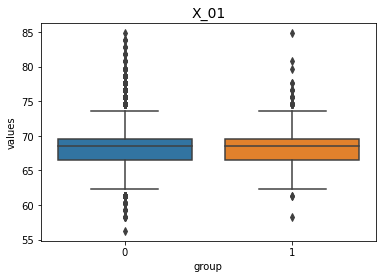

In [ ]:
boxplot_generator(train_column = 'X_01', target_column = 'Y_01')

In [ ]:
def scatter_generator(train_column = 'X_01', target_column = 'Y_01'):
    xs = range(len(train_x))
    test = pd.DataFrame({'xs': xs, 'ys': train_x[train_column], 'group': df_indicator[target_column]})
    plt.figure(figsize=(15,8))
    ax = sns.scatterplot(x = 'xs', y = 'ys', hue = 'group', data = test)
    ax.set_title('{}'.format(train_column), fontsize = 14)

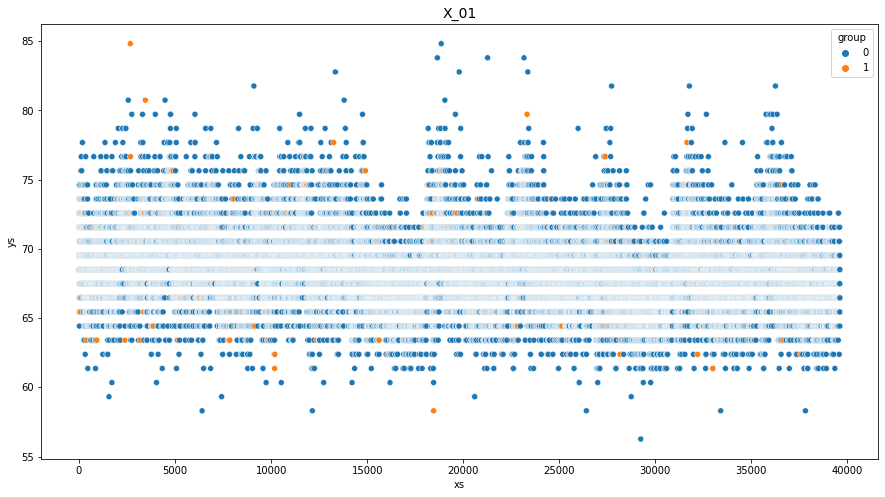

In [ ]:
scatter_generator()